In [50]:
import os
import cv2

In [51]:
features=[]
target=[]
for x in ['without_mask', 'with_mask']:
    ImagesNamesList=os.listdir("C:/Users/Lenovo/OneDrive/Documents/dataset" + "/" + str(x) )
    for y in ImagesNamesList:
        Imgarr=cv2.imread("C:/Users/Lenovo/OneDrive/Documents/dataset" + "/" + str(x) + "/" + y)
        try:
            Imgarr=cv2.resize(Imgarr,(100,100))
            features.append(Imgarr)
        except:
            pass
        else:
            if x=="without_mask":
                target.append(0)
            else:
                target.append(1)
        
        
        
            
    print("In Folder", x)

In Folder without_mask
In Folder with_mask


In [52]:
import os

In [53]:
os.listdir("C:/Users/Lenovo/OneDrive/Documents/dataset")

['without_mask', 'with_mask']

In [54]:
import numpy as np

In [55]:
features=np.array(features)

In [56]:
target=np.array(target)

In [57]:
features.shape

(3810, 100, 100, 3)

In [58]:
target.shape

(3810,)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [61]:
features_train.shape

(3048, 100, 100, 3)

In [62]:
target_train.shape

(3048,)

In [63]:
features_test.shape

(762, 100, 100, 3)

In [64]:
target_test.shape

(762,)

In [65]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255

    
    
    return image

In [66]:
features_train=np.array(list(map(preprocessing,features_train)))

In [67]:
features_train=features_train.reshape(3048, 100, 100,1)

In [68]:
from keras.preprocessing.image import ImageDataGenerator

In [69]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [70]:
dataGen.fit(features_train)

In [71]:
batches=dataGen.flow(features_train,target_train,batch_size=20)

In [72]:
images,labels=next(batches)

In [73]:
import matplotlib.pyplot as plt

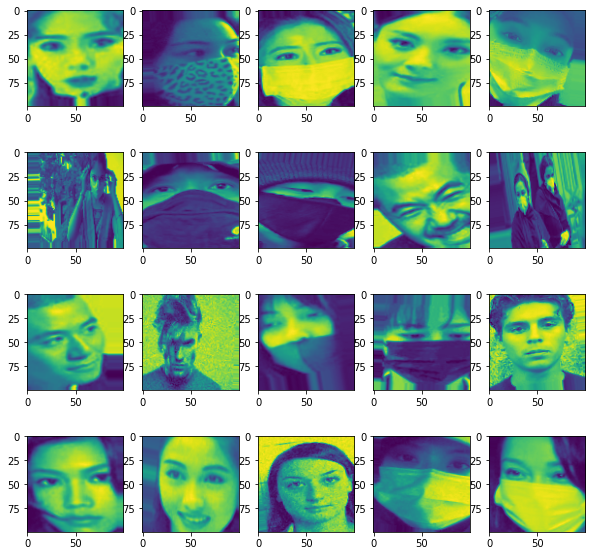

In [74]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(100,100))
plt.show()
    

In [75]:
from keras.utils import to_categorical

In [76]:
target_train=to_categorical(target_train)

In [77]:
target_train.shape

(3048, 2)

In [78]:
# Step 1:

In [79]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [80]:
model=Sequential()
model.add(Conv2D(100,(3,3),activation="relu",input_shape=(100,100,1)))
model.add(Conv2D(200,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [81]:
# Step 2:

In [82]:
from keras.optimizers import Adam

In [83]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# # Step 3:

In [84]:
model.fit_generator(dataGen.flow(features_train,target_train,batch_size=20),epochs=20)

Epoch 1/20
153/153 [==============================] - 92s 599ms/step - loss: 0.6081 - accuracy: 0.6467
Epoch 2/20
153/153 [==============================] - 81s 530ms/step - loss: 0.4897 - accuracy: 0.7733
Epoch 3/20
153/153 [==============================] - 81s 527ms/step - loss: 0.4416 - accuracy: 0.7995
Epoch 4/20
153/153 [==============================] - 82s 539ms/step - loss: 0.3875 - accuracy: 0.8320
Epoch 5/20
153/153 [==============================] - 87s 567ms/step - loss: 0.3349 - accuracy: 0.8589
Epoch 6/20
153/153 [==============================] - 87s 567ms/step - loss: 0.3158 - accuracy: 0.8671
Epoch 7/20
153/153 [==============================] - 83s 540ms/step - loss: 0.2827 - accuracy: 0.8894
Epoch 8/20
153/153 [==============================] - 87s 570ms/step - loss: 0.2787 - accuracy: 0.8842
Epoch 9/20
153/153 [==============================] - 90s 590ms/step - loss: 0.2400 - accuracy: 0.9016
Epoch 10/20
153/153 [==============================] - 93s 606ms/step - l

# Step 4:

In [85]:
with open("D:/Datasets/testCorona.txt","w") as abc:
    abc.write("Sachin the greatest of all time")
    abc.close()

In [86]:
from keras.models import model_from_json

In [87]:
model_json=model.to_json()
with open("verzeoAICorona.json","w") as abc:
    abc.write(model_json)
    abc.close()
model.save_weights("verzeoAICoronaWeights.h5")
print("Save the Model")

Save the Model


In [91]:
json_file=open("verzeoAICorona.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("verzeoAICoronaWeights.h5")
print("Loaded Model Sucesssfully")

Loaded Model Sucesssfully


In [92]:
import numpy as np
import cv2

 

def getClassName(classNo):
    if   classNo == 0: return 'Without Mask'
    elif classNo == 1: return 'Mask'
   


In [93]:
capt=cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)

True

In [ ]:
while True:
    message,image=capt.read()
    imagearr=np.asarray(image)
    face_cascade=cv2.CascadeClassifier("C:/Users/Lenovo/haarcascade_frontalface_default.xml")
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.05,3)
    for (x,y,w,h) in faces:
        detectedFace=image[x:x+w,y:y+h]
        detectedFace=cv2.resize(detectedFace,(100,100))
        detectedFace=preprocessing(detectedFace)
        detectedFace=detectedFace.reshape(1,100,100,1)
        predictions=loaded_model.predict(detectedFace)
        classIndex=loaded_model.predict_classes(imagearr)
        probabilityValue=np.amax(predictions)
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        if probabilityValue>0.75:
            cv2.putText(image,getClassName(classIndex),(x , y-3),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
            cv2.putText(image,str(int(probabilityValue * 100)) + " %",( x+w+20,y-3),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.imshow("Model Prediction",image)
        returnedValue=cv2.waitKey(1)
        if returnedValue==ord("s") or returnedValue==ord("S"):
            cv2.destroyAllWindows()
            break
        
        
        
        
    
    
    
    
    
        
    
    
    
    
    

\ mean the character that is going to come after it, do not consider it as a part of the syntax. Instead consider it as a character only